In [11]:
#importing essenstial libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['fivethirtyeight'])
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import xticks

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
df = pd.read_csv("bank-marketing.csv")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


### Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [14]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [15]:
df.pdays.median()

-1.0

So here mean = -1,minimum value=-1 and median =-1,which does not infer anything , basically its not fit and -1 doen't make any sense so we need to first fit this data.

### Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [16]:
df1 = df[df['pdays']>0]
df1

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,20000,single,secondary,yes,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45201,53,management,100000,married,tertiary,yes,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45204,73,retired,55000,married,secondary,yes,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [17]:
df1.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [18]:
df1.pdays.median()

194.0

Mean=224,Minimum value =1 and Median= 194 

### Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

In [19]:
df.groupby('education').median()['balance']

education
primary      403
secondary    392
tertiary     577
unknown      568
Name: balance, dtype: int64

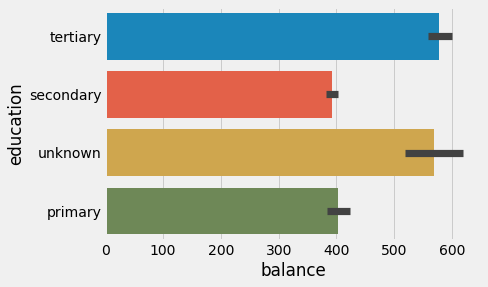

In [20]:
sns.barplot(x=df['balance'],y=df['education'],estimator=np.median)

As You can see from above Analysis observe.Tertiary education has higher median value

### Make a box plot for pdays. Do you see any outliers?

In [21]:
df1.pdays.value_counts()

182    167
92     147
91     126
183    126
181    117
      ... 
3        1
850      1
842      1
826      1
603      1
Name: pdays, Length: 558, dtype: int64

AxesSubplot(0.08,0.07;0.87x0.81)


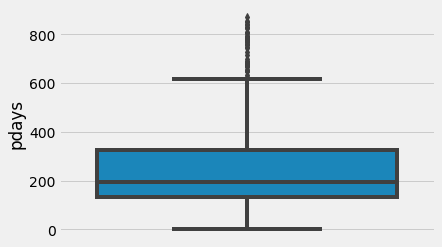

In [22]:
print(sns.boxplot(y=df1['pdays']))

Ignoring missing valuess (-1)

AxesSubplot(0.08,0.07;0.87x0.81)


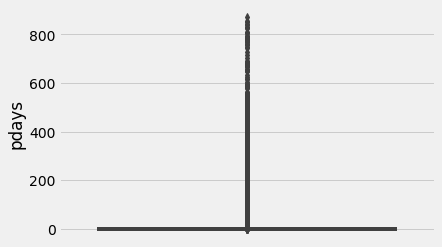

In [23]:
print(sns.boxplot(y=df['pdays']))

In [24]:
df.pdays.value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

So the above Analysis is with missing values (-1) and not adjusted outliers .

### The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”.



1.Performing bi-variate analysis to identify the features that are directly associated with the target variable before predicting


2.Converting the response variable to a dummy variable



In [25]:
df=pd.get_dummies(df,columns=['response'],drop_first=True)
df

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response_yes
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


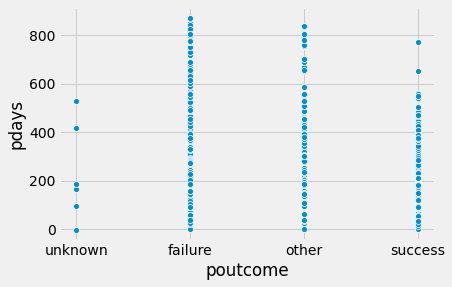

In [26]:
sns.scatterplot(x='poutcome',y='pdays',data=df)

In [27]:
df.head(2)

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response_yes
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0


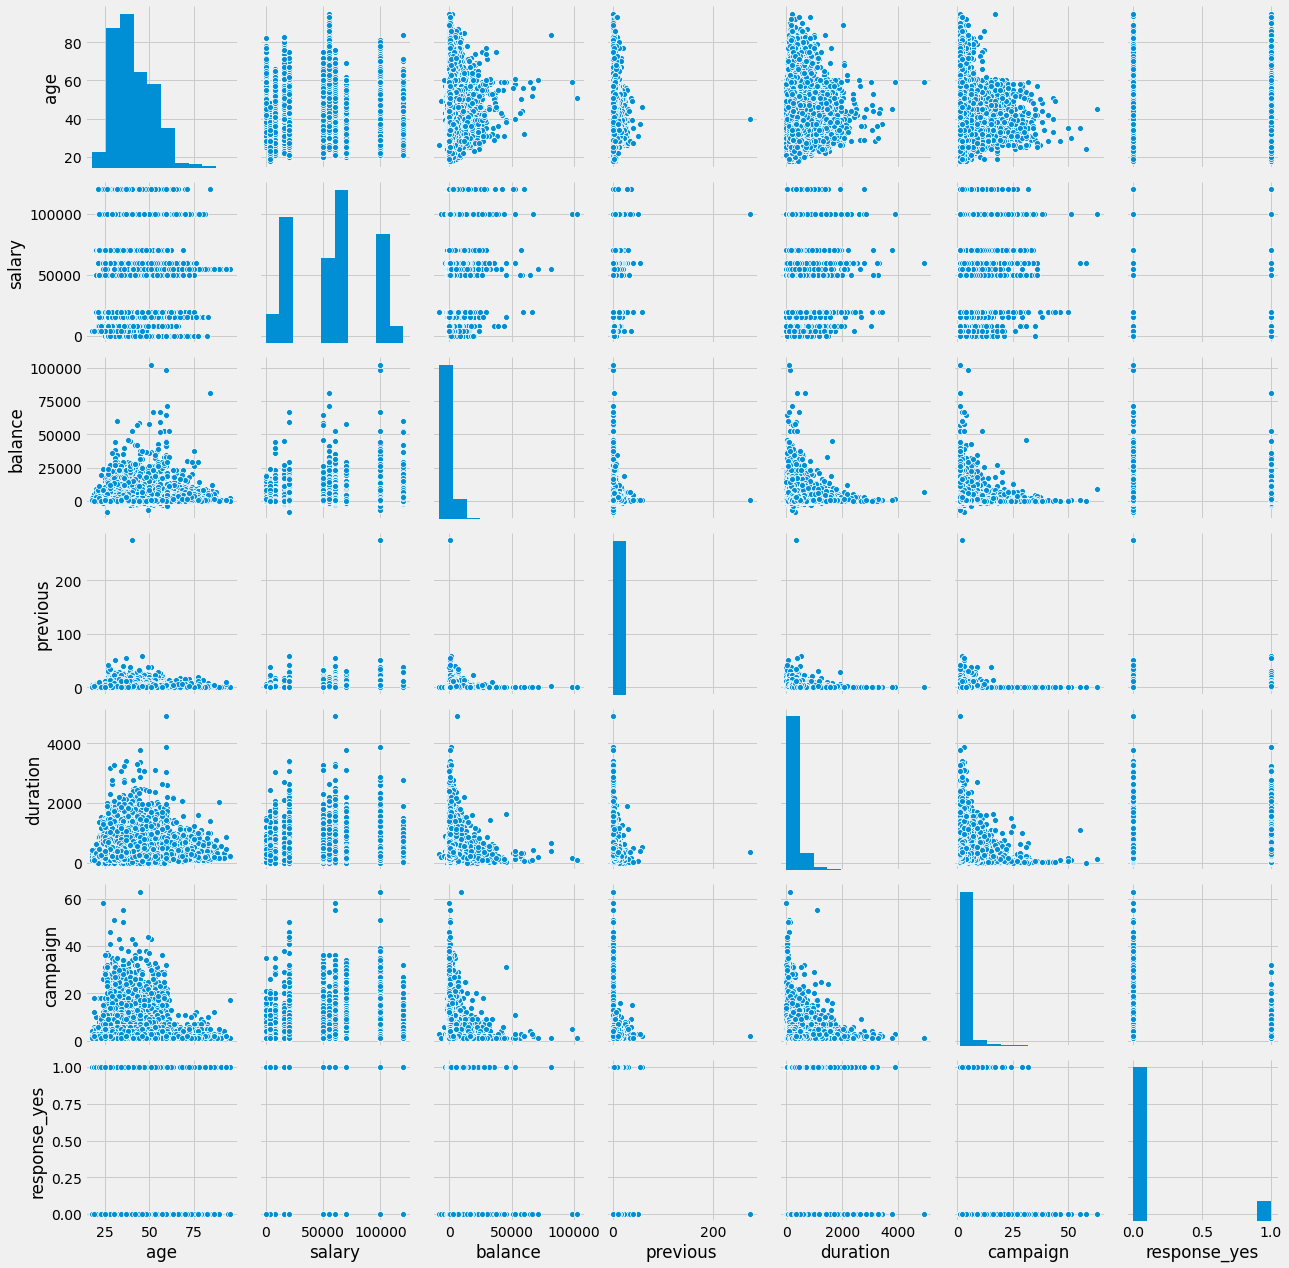

In [28]:
sns.pairplot(df[['age','salary','balance','previous','duration','campaign','response_yes']])

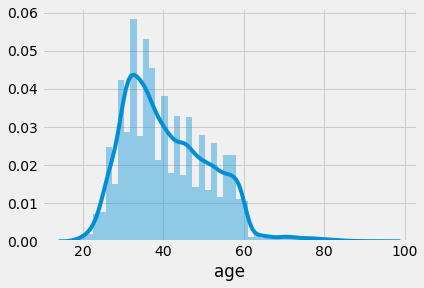

In [29]:
sns.distplot(df['age'],bins=50)

In [30]:
lst = [df]
for column in lst:
    column.loc[column["age"] < 30,  'age group'] = 30
    column.loc[(column["age"] >= 30) & (column["age"] <= 44), 'age group'] = 40
    column.loc[(column["age"] >= 45) & (column["age"] <= 59), 'age group'] = 50
    column.loc[column["age"] >= 60, 'age group'] = 60

In [31]:
agewise_response = pd.crosstab(df['response_yes'],df['age group']).apply(lambda x: x/x.sum() * 100)
agewise_response = agewise_response.transpose()

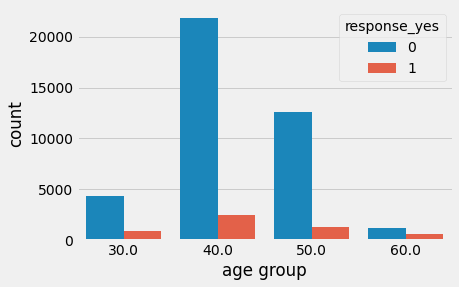

In [32]:
sns.countplot(x='age group', data=df, hue='response_yes')

In [33]:
print('Success rate and total people with different age groups contacted:')
print('People with age < 30 contacted: {}, Success rate: {}'.format(len(df[df['age group'] == 30]), df[df['age group'] == 30].response_yes.value_counts()[1]/len(df[df['age group'] == 30])))
print('People between 30 & 45 contacted: {}, Success rate: {}'.format(len(df[df['age group'] == 40]), df[df['age group'] == 40].response_yes.value_counts()[1]/len(df[df['age group'] == 40])))
print('People between 40 & 60 contacted: {}, Success rate: {}'.format(len(df[df['age group'] == 50]), df[df['age group'] == 50].response_yes.value_counts()[1]/len(df[df['age group'] == 50])))
print('People with 60+ age contacted: {}, Success rate: {}'.format(len(df[df['age group'] == 60]), df[df['age group'] == 60].response_yes.value_counts()[1]/len(df[df['age group'] == 60])))

Success rate and total people with different age groups contacted:
People with age < 30 contacted: 5273, Success rate: 0.1759908970225678
People between 30 & 45 contacted: 24274, Success rate: 0.10117821537447474
People between 40 & 60 contacted: 13880, Success rate: 0.09402017291066282
People with 60+ age contacted: 1784, Success rate: 0.336322869955157


So You can see the analysis its preety clear that People with age < 30 or 60+ have high success rate.

### WTR Job field

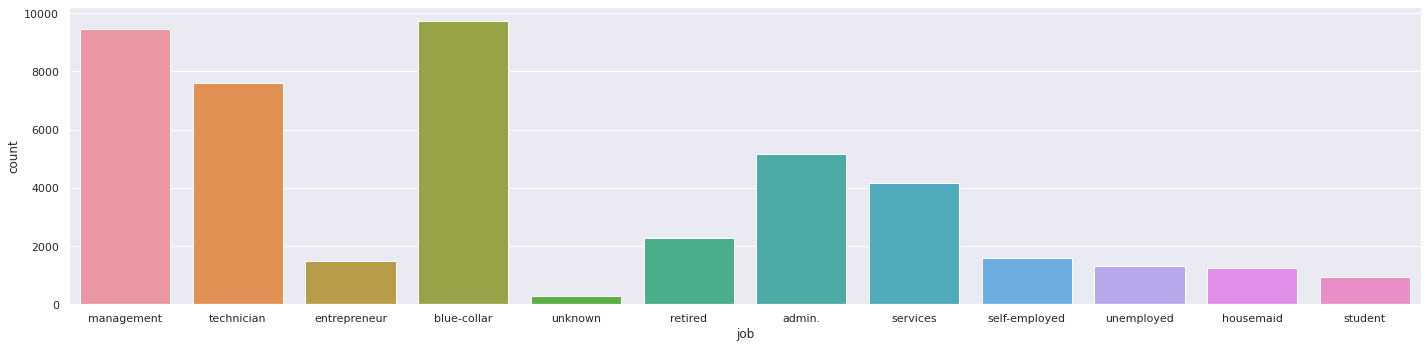

In [34]:
sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(x='job', data=df)
plt.tight_layout()

Text(0.5, 1.0, 'Response recieved with respect to JOB')

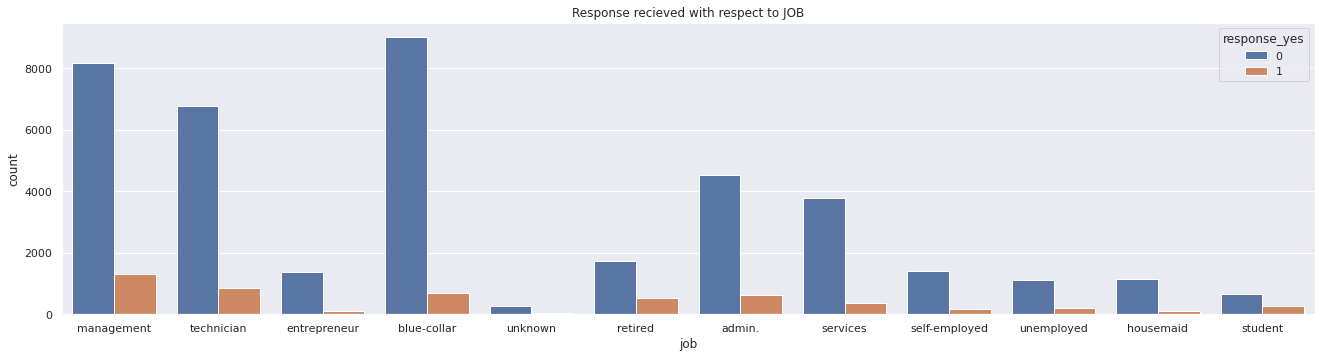

In [35]:
sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(x=df['job'], data=df, hue=df['response_yes'])
plt.title('Response recieved with respect to JOB')

Now creating a table to count of peoples with there jobs and its Success Rate 

In [36]:
from prettytable import PrettyTable

In [37]:
counts = PrettyTable(['Job', 'Total Clients', 'Success rate'])
counts.add_row(['Blue-collar', len(df[df['job'] == 'blue-collar']), df[df['job'] == 'blue-collar'].response_yes.value_counts()[1]/len(df[df['job'] == 'blue-collar'])])
counts.add_row(['Management', len(df[df['job'] == 'management']), df[df['job'] == 'management'].response_yes.value_counts()[1]/len(df[df['job'] == 'management'])])
counts.add_row(['Technician', len(df[df['job'] == 'technician']), df[df['job'] == 'technician'].response_yes.value_counts()[1]/len(df[df['job'] == 'technician'])])
counts.add_row(['Admin', len(df[df['job'] == 'admin.']), df[df['job'] == 'admin.'].response_yes.value_counts()[1]/len(df[df['job'] == 'admin.'])])
counts.add_row(['Services', len(df[df['job'] == 'services']), df[df['job'] == 'services'].response_yes.value_counts()[1]/len(df[df['job'] == 'services'])])
counts.add_row(['Retired', len(df[df['job'] == 'retired']), df[df['job'] == 'retired'].response_yes.value_counts()[1]/len(df[df['job'] == 'retired'])])
counts.add_row(['Self-employed', len(df[df['job'] == 'self-employed']), df[df['job'] == 'self-employed'].response_yes.value_counts()[1]/len(df[df['job'] == 'self-employed'])])
counts.add_row(['Entrepreneur', len(df[df['job'] == 'entrepreneur']), df[df['job'] == 'entrepreneur'].response_yes.value_counts()[1]/len(df[df['job'] == 'entrepreneur'])])
counts.add_row(['Unemployed', len(df[df['job'] == 'unemployed']), df[df['job'] == 'unemployed'].response_yes.value_counts()[1]/len(df[df['job'] == 'unemployed'])])
counts.add_row(['Housemaid', len(df[df['job'] == 'housemaid']), df[df['job'] == 'housemaid'].response_yes.value_counts()[1]/len(df[df['job'] == 'housemaid'])])
counts.add_row(['Student', len(df[df['job'] == 'student']), df[df['job'] == 'student'].response_yes.value_counts()[1]/len(df[df['job'] == 'student'])])
counts.add_row(['Unknown', len(df[df['job'] == 'unknown']), df[df['job'] == 'unknown'].response_yes.value_counts()[1]/len(df[df['job'] == 'unknown'])])
print(counts)

+---------------+---------------+---------------------+
|      Job      | Total Clients |     Success rate    |
+---------------+---------------+---------------------+
|  Blue-collar  |      9732     | 0.07274969173859433 |
|   Management  |      9458     | 0.13755550856417847 |
|   Technician  |      7597     | 0.11056996182703699 |
|     Admin     |      5171     | 0.12202668729452718 |
|    Services   |      4154     | 0.08883004333172845 |
|    Retired    |      2264     | 0.22791519434628976 |
| Self-employed |      1579     | 0.11842938568714376 |
|  Entrepreneur |      1487     | 0.08271687962340282 |
|   Unemployed  |      1303     | 0.15502686108979277 |
|   Housemaid   |      1240     | 0.08790322580645162 |
|    Student    |      938      |  0.2867803837953092 |
|    Unknown    |      288      | 0.11805555555555555 |
+---------------+---------------+---------------------+


### Visualizations

Text(0.5, 1.0, 'Count Plot of poutcome for target variable')

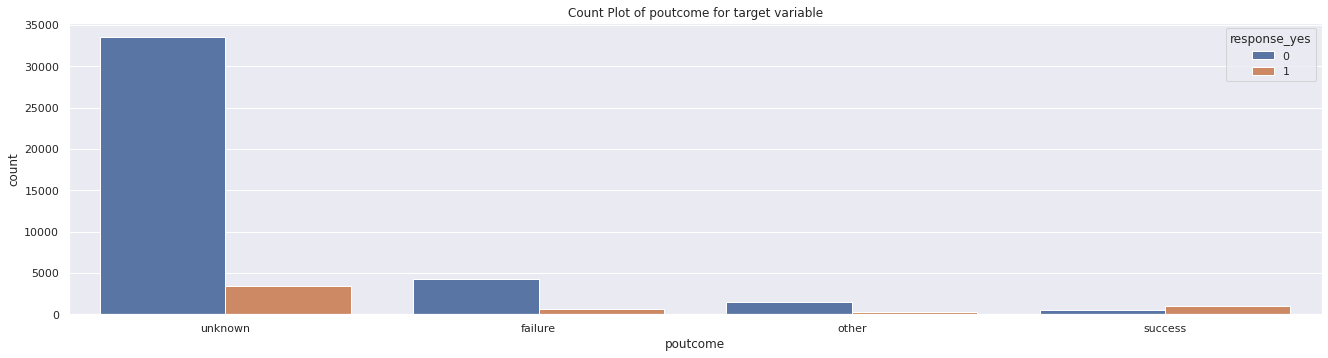

In [38]:
sns.countplot(x=df['poutcome'], data=df, hue=df['response_yes'])
plt.title('Count Plot of poutcome for target variable')

Text(0.5, 1.0, 'Salary wise and response')

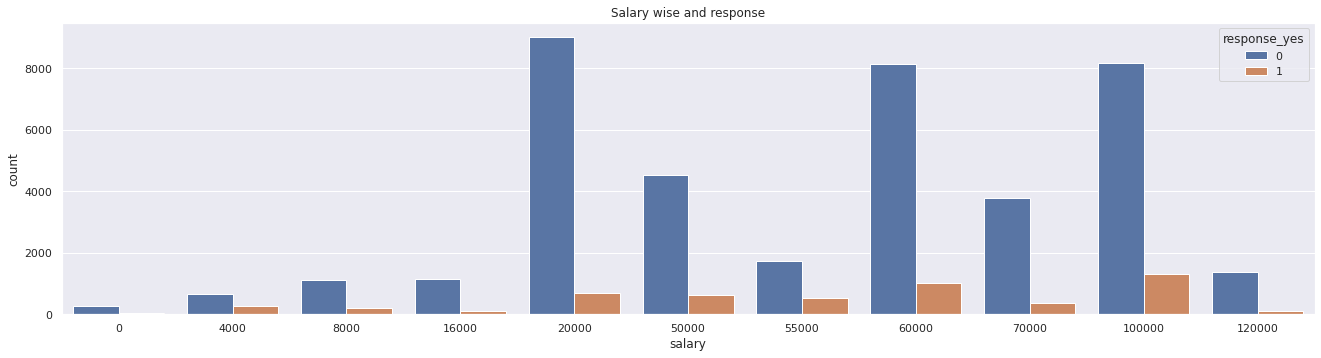

In [39]:
sns.countplot(x=df['salary'], data=df, hue=df['response_yes'])
plt.title('Salary wise and response')

Text(0.5, 1.0, 'Respinse received based on education')

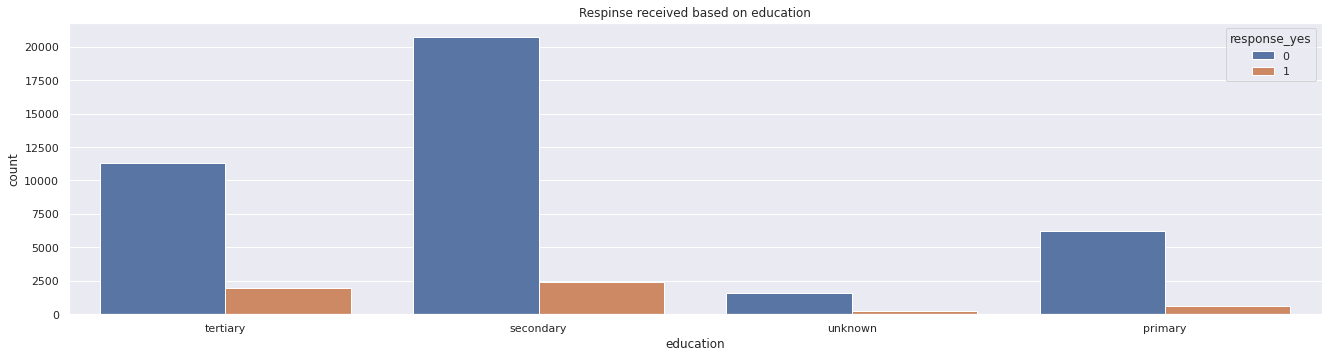

In [40]:
sns.countplot(x=df['education'], data=df, hue=df['response_yes'])
plt.title('Respinse received based on education')

Text(0.5, 1.0, 'Response received against defaulters')

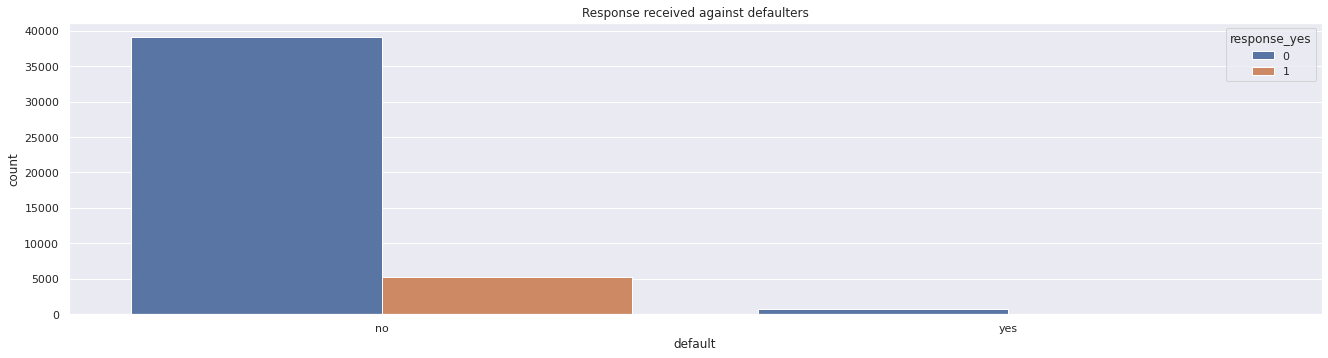

In [41]:
sns.countplot(x=df['default'], data=df, hue=df['response_yes'])
plt.title('Response received against defaulters')


In [42]:
df[df['default']=='yes'].response_yes.count()

815

Text(0.5, 1.0, 'Count plot of loan for target variable y')

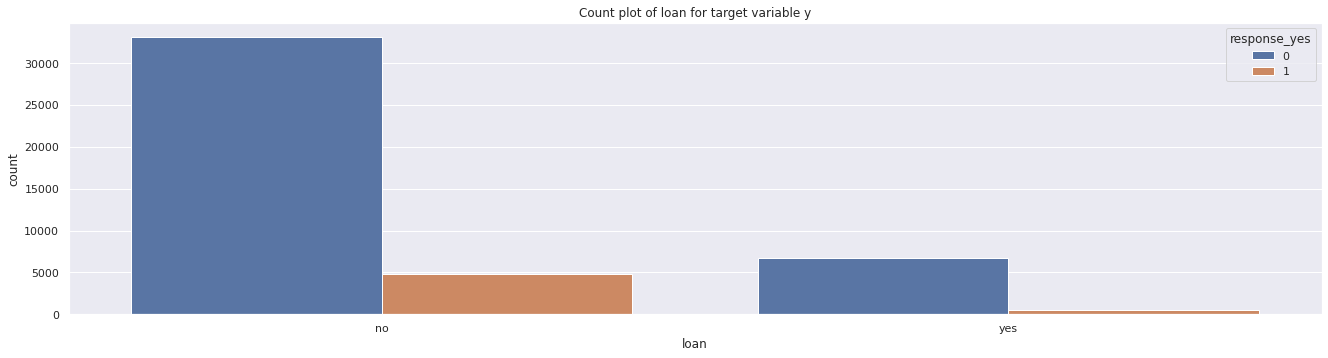

In [43]:
sns.countplot(x=df['loan'], data=df, hue=df['response_yes'])
plt.title('Count plot of loan for target variable y')

Text(0.5, 1.0, 'Modes of Communication:')

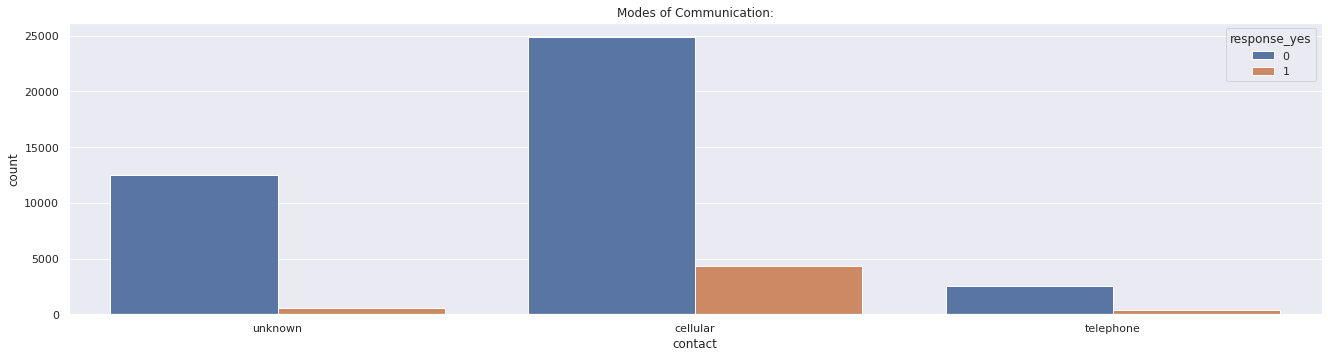

In [44]:
sns.countplot(x=df['contact'], data=df, hue=df['response_yes'])
plt.title('Modes of Communication:')

In [45]:
df.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Text(0.5, 1.0, 'MOnth wise communication and response')

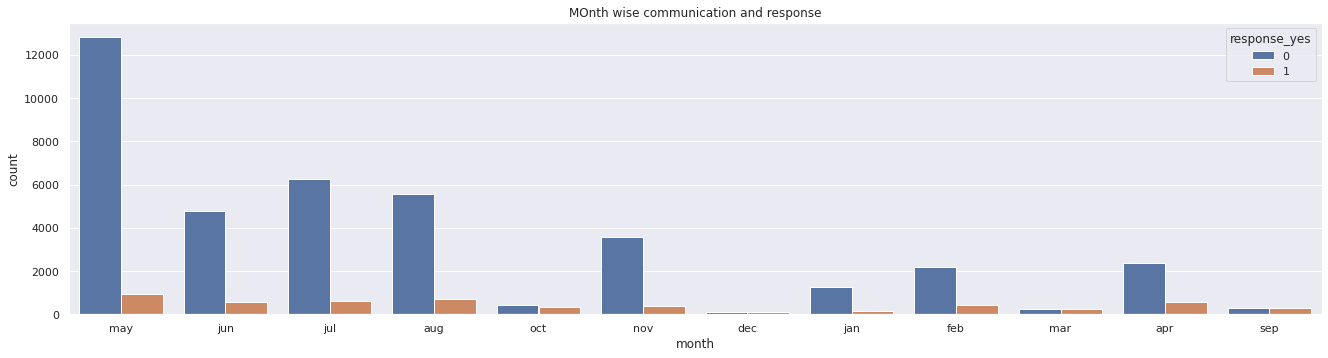

In [46]:
sns.countplot(x=df['month'], data=df, hue=df['response_yes'])
plt.title('MOnth wise communication and response')

In [47]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical = [x for x in df.columns.to_list() if x not in categorical]
numerical.remove('response_yes')
numerical.remove('age group')

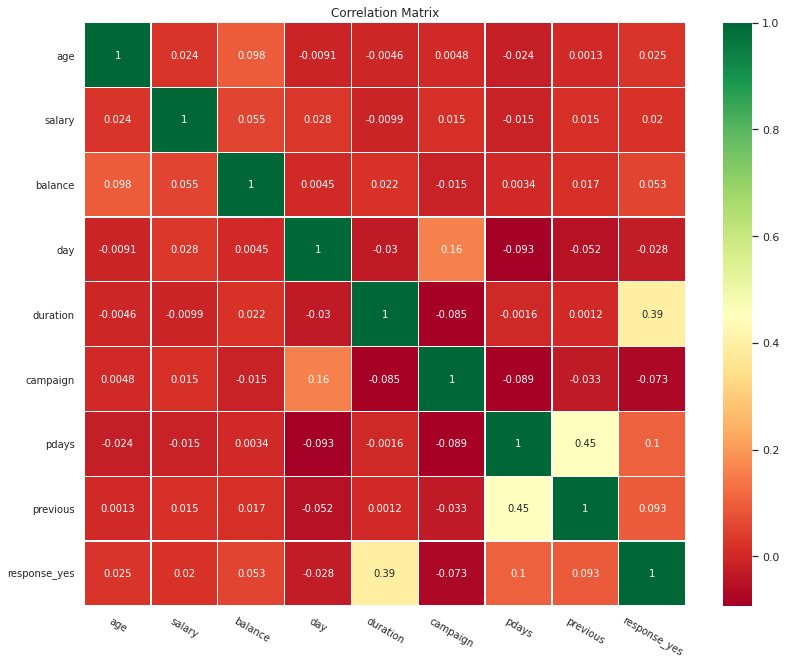

In [48]:
corr_data = df[numerical + ['response_yes']]
corr = corr_data.corr()
plt.close()
cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

### Are the features about the previous campaign data useful?
As we can see in above correlatiion matrix, previous cmapaign data is not much correlated,and have only 0.093 almost close 0 .so previous data cannot be used to prediict much

### Are pdays and poutcome associated with the target?
If yes, and if you plan to use them – how do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain your approach and your decision

In [49]:
pd.crosstab(df['pdays'],df['poutcome'])

poutcome,failure,other,success,unknown
pdays,,,,
-1,0,0,0,36954
1,3,3,9,0
2,1,35,1,0
3,0,1,0,0
4,1,0,1,0
...,...,...,...,...
838,0,1,0,0
842,1,0,0,0
850,1,0,0,0


In [50]:
pd.crosstab(df['pdays'],df['poutcome'],values=df['response_yes'],aggfunc='count',margins=True,normalize=True)


poutcome,failure,other,success,unknown,All
pdays,,,,,
-1,0.000000,0.000000,0.000000,0.817367,0.817367
1,0.000066,0.000066,0.000199,0.000000,0.000332
2,0.000022,0.000774,0.000022,0.000000,0.000818
3,0.000000,0.000022,0.000000,0.000000,0.000022
4,0.000022,0.000000,0.000022,0.000000,0.000044
...,...,...,...,...,...
842,0.000022,0.000000,0.000000,0.000000,0.000022
850,0.000022,0.000000,0.000000,0.000000,0.000022
854,0.000022,0.000000,0.000000,0.000000,0.000022


In [51]:
pd.crosstab(df['pdays'],df['previous'],values=df['response_yes'],aggfunc='count',margins=True,normalize=True)

previous,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,32,35,37,38,40,41,51,55,58,275,All
pdays,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1,0.817367,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817367
1,0.000000,0.000111,0.000022,0.000044,0.000000,0.000022,0.000044,0.000066,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000332
2,0.000000,0.000310,0.000177,0.000155,0.000022,0.000088,0.000022,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000818
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000022
4,0.000000,0.000044,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000022
850,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000022
854,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000022


**Yes, pdays and poutcomes are associated with the target ,pdays=-1 which has overall count of 36954 same as previous=0 ,i.e Many of people were not contacted.**

### Before the predictive modeling part, make sure to perform –
- The necessary transformations for the categorical variables and the numeric variables
- Handle variables corresponding to the previous campaign
- Train test split

(We will convert previous marketing campaigns variables into dummy variables)

In [52]:
df=pd.get_dummies(df,drop_first=True)
df

,age,salary,balance,day,duration,campaign,pdays,previous,response_yes,age group,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,targeted_yes,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,100000,2143,5,261,1,-1,0,0,50.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,44,60000,29,5,151,1,-1,0,0,40.0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,33,120000,2,5,76,1,-1,0,0,40.0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,47,20000,1506,5,92,1,-1,0,0,50.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,33,0,1,5,198,1,-1,0,0,40.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,60000,825,17,977,3,-1,0,1,50.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
45207,71,55000,1729,17,456,2,-1,0,1,60.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
45208,72,55000,5715,17,1127,5,184,3,1,60.0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
45209,57,20000,668,17,508,4,-1,0,0,50.0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [53]:
df.info

<bound method DataFrame.info of        age  salary  balance  ...  poutcome_other  poutcome_success  poutcome_unknown
0       58  100000     2143  ...               0                 0                 1
1       44   60000       29  ...               0                 0                 1
2       33  120000        2  ...               0                 0                 1
3       47   20000     1506  ...               0                 0                 1
4       33       0        1  ...               0                 0                 1
...    ...     ...      ...  ...             ...               ...               ...
45206   51   60000      825  ...               0                 0                 1
45207   71   55000     1729  ...               0                 0                 1
45208   72   55000     5715  ...               0                 1                 0
45209   57   20000      668  ...               0                 0                 1
45210   37  120000     2971  ... 

In [54]:
df.columns

Index(['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'response_yes', 'age group', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'targeted_yes', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [55]:
#Train test split
X=df.drop('response_yes', axis=1)
Y=df['response_yes']

## Predictive model 1: Logistic regression
- Make a predictive model using logistic regression
- Using RFE to select top n features in an automated fashion (choose n as you see fit)



In [56]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
import statsmodels.api as sm 

In [57]:
logm=LogisticRegression()

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
# 30% data is used for testing
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.3, random_state=0)

In [60]:
logm.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
rfe = RFE(logm, 10)
rfe = rfe.fit(X_train, Y_train)
rfe_ = X_train.columns[rfe.support_]
rfe_

Index(['housing_yes', 'contact_unknown', 'month_aug', 'month_dec', 'month_jan',
       'month_jul', 'month_mar', 'month_oct', 'month_sep', 'poutcome_success'],
      dtype='object')

- Using p values and VIF, get rid of the redundant features

In [62]:
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)


In [63]:
X_new_train=X_train[rfe_]

In [64]:
checkVIF(X_new_train)

,Features,VIF
3,month_dec,1.01
7,month_oct,0.50
8,month_sep,0.36
6,month_mar,0.26
4,month_jan,0.23
5,month_jul,0.05
9,poutcome_success,0.03
0,housing_yes,0.02
1,contact_unknown,0.02
2,month_aug,0.00


In [65]:
X_new=df[['housing_yes', 'contact_unknown','month_aug','month_jan',
       'month_jul', 'month_mar', 'month_oct', 'month_sep', 'poutcome_success']]
Y=df['response_yes']


In [66]:
X_new_train, X_new_test, Y_train, Y_test= train_test_split(X_new, Y, test_size=0.3, random_state=0)

In [67]:
z=logm.fit(X_new_train,Y_train)
z

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

- Estimate the model performance using k fold cross validation
- What is the precision, recall, accuracy of your model?
- Which features are the most important from your model?

In [68]:
auc=[X_train,X_new_train]
models = []
models.append(('LogisticRegression', LogisticRegression()))
for i in auc:
        kfold = KFold(n_splits=10, random_state=0)    
        # train model
        cv_results = cross_val_score(LogisticRegression(), i, Y_train, cv=kfold, scoring='accuracy')    
        msg = "%s: %f (%f)" % (LogisticRegression, cv_results.mean(), cv_results.std())
        print(msg)

<class 'sklearn.linear_model._logistic.LogisticRegression'>: 0.889468 (0.003230)
<class 'sklearn.linear_model._logistic.LogisticRegression'>: 0.893007 (0.003134)


**So by VIF and Kfold we are getting 89% Accuracy**

In [69]:
Y_pred=z.predict(X_new_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [70]:
Y_pred.shape

(13564,)

In [71]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [72]:
print(confusion_matrix(Y_test,Y_pred))

[[11756   213]
 [ 1281   314]]


In [73]:
#Precision , recall and accuracy of our model
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.60      0.20      0.30      1595

    accuracy                           0.89     13564
   macro avg       0.75      0.59      0.62     13564
weighted avg       0.87      0.89      0.86     13564



Thus you can compare the score now, and the most important features of the model are Month,housing,poutcome and contact.

## Predictive model 2: Random Forest
- Make a predictive model using random forest technique
- Use not more than 50 trees, and control the depth of the trees to prevent overfitting

In [74]:
#Importing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


In [75]:
#fitting
rfc = RandomForestClassifier(n_estimators=50,max_depth=50)
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
y_pred=rfc.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=uint8)

In [77]:
print(confusion_matrix(Y_test,y_pred))

[[11641   328]
 [ 1001   594]]


In [78]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11969
           1       0.64      0.37      0.47      1595

    accuracy                           0.90     13564
   macro avg       0.78      0.67      0.71     13564
weighted avg       0.89      0.90      0.89     13564



- Estimating the model performance using k fold cross validation

In [79]:
p=[X_train,X_new_train]

In [80]:
for i in p:
    kf = KFold(n_splits=10)    
    cross_v = cross_val_score(RandomForestClassifier(), i, Y_train, cv=kfold, scoring='accuracy')  
    print('Cross validation score:',cross_v.mean())

Cross validation score: 0.9051729568227073
Cross validation score: 0.8936707189691294


CV Score 90% is for all features and
89.36% is for selected features.

In [81]:
model_new = RandomForestClassifier(n_estimators=45,max_depth=10)
model_new.fit(X_new_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=45,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:
y1_pred=model_new.predict(X_new_test)
y1_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [83]:
print('For all features')
print(accuracy_score(Y_test, y1_pred))
print('For selected features')
print(accuracy_score(Y_test, y1_pred))

For all features
0.8919197876732528
For selected features
0.8919197876732528


In [84]:
print(confusion_matrix(Y_test,y1_pred))

[[11851   118]
 [ 1348   247]]


In [85]:
#Precision , recall and accuracy of our model
print(classification_report(Y_test, y1_pred))


              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11969
           1       0.68      0.15      0.25      1595

    accuracy                           0.89     13564
   macro avg       0.79      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564



### Compare the performance of the Random Forest and the logistic model –
- Evaluate both models on the test set
- Which metric did you choose and why?
 
 
` we have used classification performance metrics such as, Precision score,accuracy score , recall score and Cross val score etc. In order to estimate the error, the model is required to test a dataset which it hasn’t seen yet.`

- Which model has better performance on the test set?


```
Logistic has better accuracy score compare to random forest so you can say thats better model for test set.
```



